In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

import preprocessing
import algorithms
import plots

In [2]:
DATA_PATH_1 = Path("../data/data1.mat")
DATA_PATH_2 = Path("../data/data2.mat")
DATA_PATH_3 = Path("../data/data3.mat")
DATA_PATH_4 = Path("../data/emailSample1.txt")
DATA_PATH_5 = Path("../data/vocab.txt")
DATA_PATH_6 = Path("../data/spamTrain.mat")
DATA_PATH_7 = Path("../data/spamTest.mat")

# Part 1

## Support Vector Machines
In the first half of this exercise, you will be using support vector machines
(SVMs) with various example 2D datasets. Experimenting with these datasets
will help you gain an intuition of how SVMs work and how to use a Gaussian
kernel with SVMs. In the next half of the exercise, you will be using support
vector machines to build a spam classifier.

In [3]:
x, y = preprocessing.read_data(DATA_PATH_1)
# x = preprocessing.include_intercept(x)
data = preprocessing.ClassifiedData.from_data(x, y)

## Example Dataset 1
We will begin by with a 2D example dataset which can be separated by a
linear boundary. The script ex6.m will plot the training data (Figure 1). In
this dataset, the positions of the positive examples (indicated with +) and the
negative examples (indicated with o) suggest a natural separation indicated
by the gap. However, notice that there is an outlier positive example + on
the far left at about (0.1, 4.1). As part of this exercise, you will also see how
this outlier affects the SVM decision boundary.

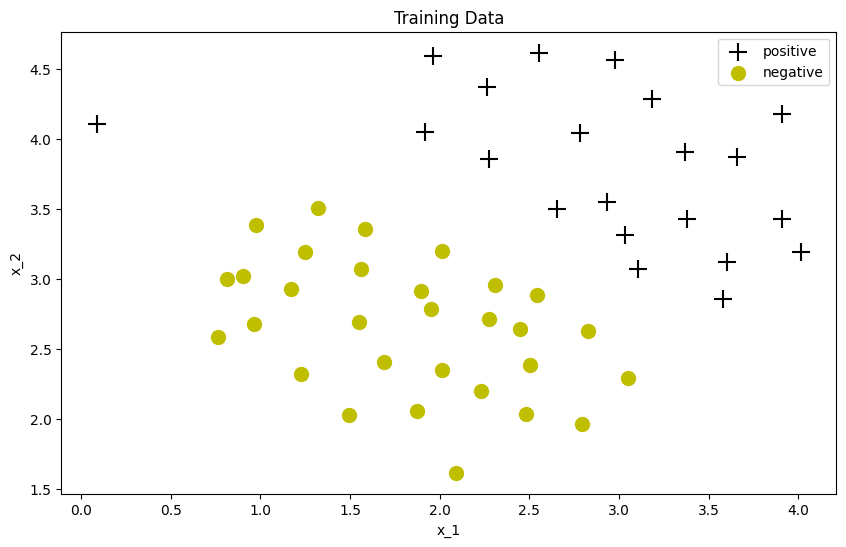

In [4]:
plots.plot_data(data.positive, data.negative)

In this part of the exercise, you will try using different values of the C parameter with SVMs. Informally, the C parameter is a positive value that controls the penalty for misclassified training examples. A large C parameter tells the SVM to try to classify all the examples correctly. C plays a role similar to $\frac{1}{\lambda}$ , where $\lambda$ is the regularization parameter that we were using previously for logistic regression.

SVM software that we have included with the starter code, svmTrain.m.2 When C = 1, you should find that the SVM puts the decision boundary in the gap between the two datasets and misclassifies the data point on the far left.

Your task is to try different values of C on this dataset. Specifically, you should change the value of C in the script to C = 100 and run the SVM training again. When C = 100, you should find that the SVM now classifies every single example correctly, but has a decision boundary that does not appear to be a natural fit for the data.

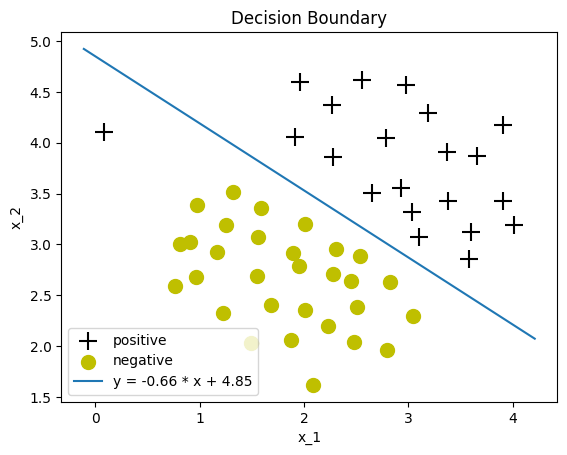

In [5]:
c_value = 1
model = algorithms.LinearSvmRegression(c_value)
model.fit(x, y)
plots.plot_data_and_svm_boundary(data.positive, data.negative, model)

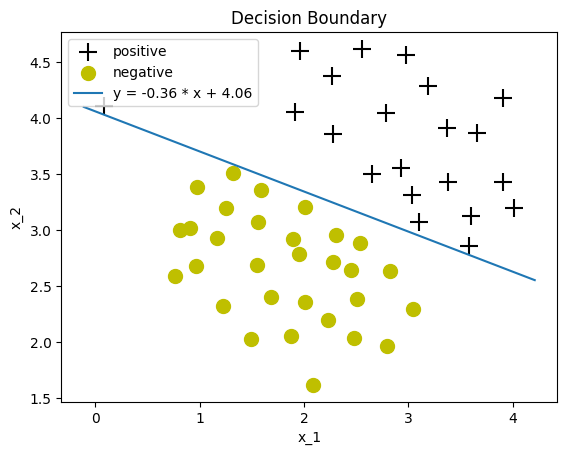

In [6]:
c_value = 100
model = algorithms.LinearSvmRegression(c_value)
model.fit(x, y)
plots.plot_data_and_svm_boundary(data.positive, data.negative, model)

# Part 2

## SVM with Gaussian Kernels
In this part of the exercise, you will be using SVMs to do non-linear classification. In particular, you will be using SVMs with Gaussian kernels on
datasets that are not linearly separable.

## Gaussian Kernel
To find non-linear decision boundaries with the SVM, we need to first implement a Gaussian kernel. You can think of the Gaussian kernel as a similarity function that measures the “distance” between a pair of examples, $(x^{(i)} , x^{(j)} )$. The Gaussian kernel is also parameterized by a bandwidth parameter, $\sigma$, which determines how fast the similarity metric decreases (to 0) as the examples are further apart.

You should now complete the code in gaussianKernel.m to compute the Gaussian kernel between two examples, $(x^{(i)} , x^{(j)} )$. The Gaussian kernel:

$$K_{gaussian}(x^{(i)} , x^{(j)})=exp(-\frac{||x^{(i)} , x^{(j)}||^2}{2\sigma^2}) = exp(-\frac{||\sum x_k^{(i)} , x_k^{(j)}||^2}{2\sigma^2})$$

Once you’ve completed the function gaussianKernel.m, the script ex6.m
will test your kernel function on two provided examples and you should expect to see a value of 0.324652.

In [7]:
x, y = preprocessing.read_data(DATA_PATH_2)
data = preprocessing.ClassifiedData.from_data(x, y)

The next part in ex6.m will load and plot dataset 2 (Figure 4). From the figure, you can obserse that there is no linear decision boundary that separates the positive and negative examples for this dataset. However, by using the Gaussian kernel with the SVM, you will be able to learn a non-linear decision boundary that can perform reasonably well for the dataset.

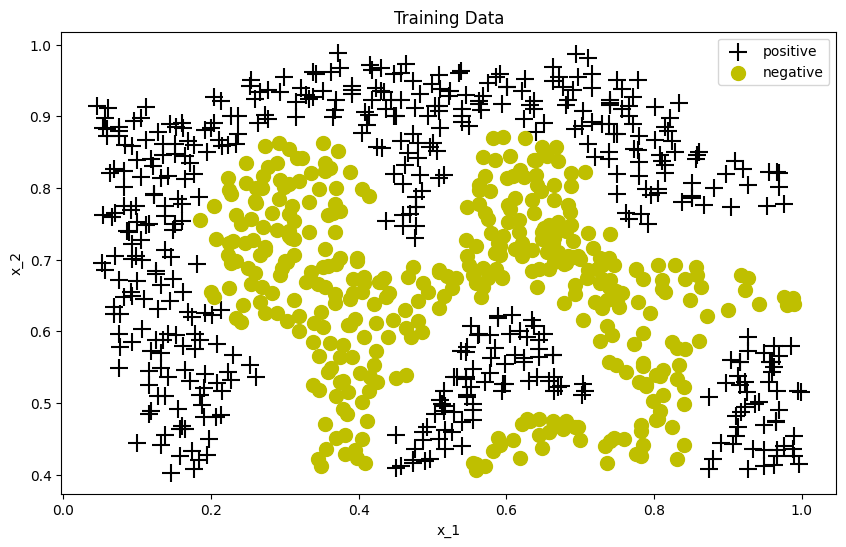

In [8]:
plots.plot_data(data.positive, data.negative)

If you have correctly implemented the Gaussian kernel function, ex6.m
will proceed to train the SVM with the Gaussian kernel on this dataset. The plot shows the decision boundary found by the SVM with a Gaussian kernel. The decision boundary is able to separate most of the positive and negative examples correctly and follows the contours of the dataset well.

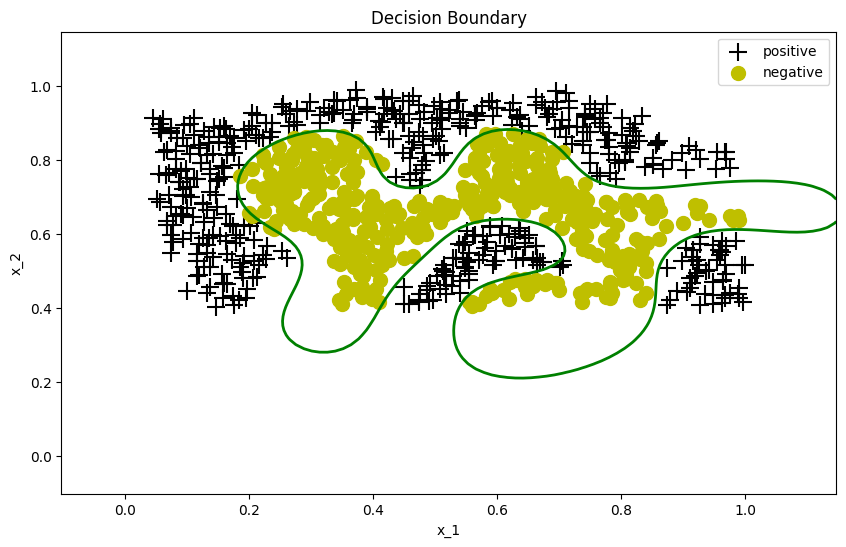

In [9]:
c_value = 1
sigma = 0.1
model = algorithms.GaussianSvmRegression(c_value, sigma)
model.fit(x, y)
plots.plot_boundary_as_contour(data.positive, data.negative, model)

# Part 3

## Example Dataset 3
In this part of the exercise, you will gain more practical skills on how to use a SVM with a Gaussian kernel. The next part of ex6.m will load and display a third dataset (Figure 6). You will be using the SVM with the Gaussian kernel with this dataset.

In the provided dataset, ex6data3.mat, you are given the variables X,
y, Xval, yval. The provided code in ex6.m trains the SVM classifier using the training set (X, y) using parameters loaded from dataset3Params.m.

In [10]:
x, y = preprocessing.read_data(DATA_PATH_3)
data = preprocessing.ClassifiedData.from_data(x, y)

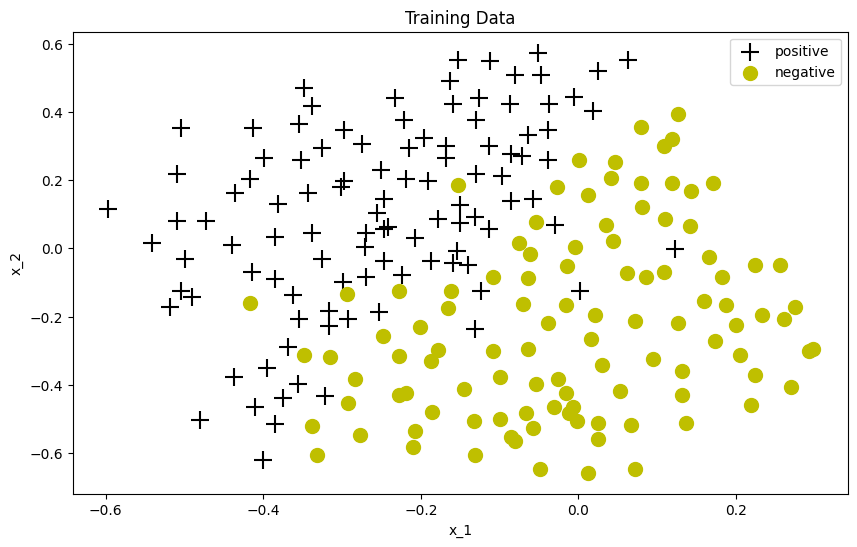

In [11]:
plots.plot_data(data.positive, data.negative)


Your task is to use the cross validation set Xval, yval to determine the
best C and σ parameter to use. You should write any additional code nec-
essary to help you search over the parameters C and $\sigma$. For both C and $\sigma$, we suggest trying values in multiplicative steps (e.g., 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30).

Note that you should try all possible pairs of values for C and σ (e.g., $C = 0.3$ and $\sigma = 0.1$). For example, if you try each of the 8 values listed above for C and for $\sigma^2$ , you would end up training and evaluating (on the cross validation set) a total of $8^2 = 64$ different models.

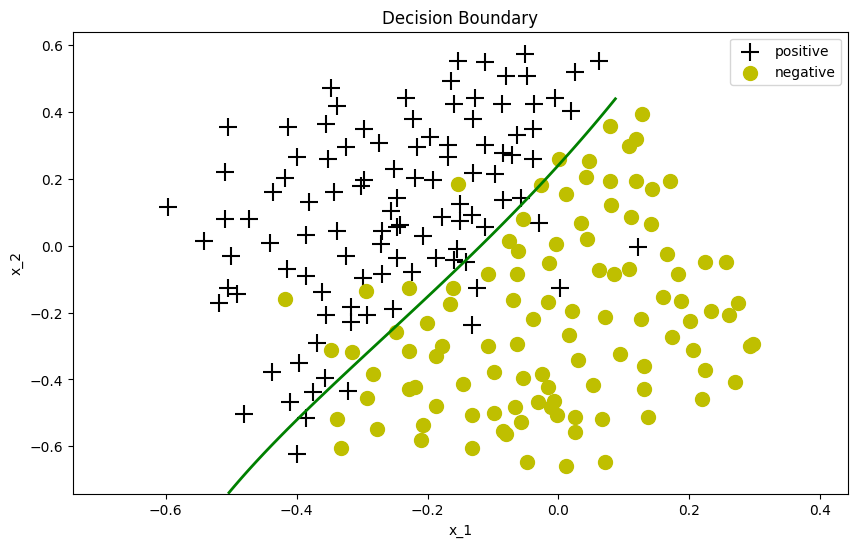

In [12]:
cross_validation = algorithms.GaussianSvmRegressionCrossValidation(
    possible_c=[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30],
    possible_sigma=[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30],
)
best_model = cross_validation.fit(x, y)
plots.plot_boundary_as_contour(data.positive, data.negative, best_model)

# Part 4

## Spam Classification
Many email services today provide spam filters that are able to classify emails into spam and non-spam email with high accuracy. In this part of the exercise, you will use SVMs to build your own spam filter.

You will be training a classifier to classify whether a given email, x, is spam (y = 1) or non-spam (y = 0). In particular, you need to convert each email into a feature vector $x \in R^n$ . The following parts of the exercise will walk you through how such a feature vector can be constructed from an email.

Throughout the rest of this exercise, you will be using the the script
ex6 spam.m. The dataset included for this exercise is based on a a subset of the SpamAssassin Public Corpus.3 For the purpose of this exercise, you will only be using the body of the email (excluding the email headers).

In [13]:
vocabulary = preprocessing.read_text_file(DATA_PATH_5)
email_content = preprocessing.read_text_file(DATA_PATH_4)
email_content = str("".join(email_content))

## Preprocessing Emails
In processEmail.m, we have implemented the following email prepro-
cessing and normalization steps:

* Lower-casing: The entire email is converted into lower case, so that captialization is ignored (e.g., IndIcaTE is treated the same as Indicate).
* Stripping HTML: All HTML tags are removed from the emails. Many emails often come with HTML formatting; we remove all the HTML tags, so that only the content remains.
* Normalizing URLs: All URLs are replaced with the text “httpaddr”.
* Normalizing Email Addresses: with the text “emailaddr”.
* Normalizing Numbers: “number”. All email addresses are replaced All numbers are replaced with the text
* Normalizing Dollars: All dollar signs (\\$) are replaced with the text “dollar”.
* Word Stemming: Words are reduced to their stemmed form. For example, “discount”, “discounts”, “discounted” and “discounting” are all replaced with “discount”. Sometimes, the Stemmer actually strips off additional characters from the end, so “include”, “includes”, “included”, and “including” are all replaced with “includ”.
* Removal of non-words: Non-words and punctuation have been removed. All white spaces (tabs, newlines, spaces) have all been trimmed to a single space character.

In [14]:
cleaner = preprocessing.WordCleaner()
email_content = cleaner.clean(email_content)

## Extracting Features from Emails
You will now implement the feature extraction that converts each email into a vector in $R^n$. For this exercise, you will be using n = # words in vocabulary list. Specifically, the feature $x_i \in \{0, 1\}$ for an email corresponds to whether the i-th word in the dictionary occurs in the email. That is, $x_i = 1$ if the i-th word is in the email and xi = 0 if the i-th word is not present in the email.

Thus, for a typical email, this feature would look like:

$$x = \begin{bmatrix}
  0 \\
  \vdots \\
  1 \\
  0 \\
  \vdots \\
  1 \\
  0 \\
  \vdots \\
  0 \\
\end{bmatrix} \in R^n$$

You should now complete the code in emailFeatures.m to generate a feature vector for an email, given the word indices.

Once you have implemented emailFeatures.m, the next part of ex6 spam.m will run your code on the email sample. You should see that the feature vector had length 1899 and 45 non-zero entries.

In [15]:
tokenizer = preprocessing.Tokenizer(vocabulary)
tokens = tokenizer.tokenize(email_content)
feature_vector_len = len(vocabulary)
features = preprocessing.extract_features(tokens, feature_vector_len)
non_zero_count = np.count_nonzero(features)

# expected: 1899, 45
print(f"Length of feature vector is {feature_vector_len}")
print(f"Number of non-zero entries is {non_zero_count}")

Length of feature vector is 1899
Number of non-zero entries is 37


## Training SVM for Spam Classification
After you have completed the feature extraction functions, the next step of ex6 spam.m will load a preprocessed training dataset that will be used to train a SVM classifier. spamTrain.mat contains 4000 training examples of spam and non-spam email, while spamTest.mat contains 1000 test examples. Each original email was processed using the processEmail and emailFeatures functions and converted into a vector $x^{(i)} \in R^{1899}$.

After loading the dataset, ex6 spam.m will proceed to train a SVM to classify between spam (y = 1) and non-spam (y = 0) emails. Once the training completes, you should see that the classifier gets a training accuracy of about 99.8% and a test accuracy of about 98.5%.

In [16]:
x, y = preprocessing.read_data(DATA_PATH_6)
model = algorithms.LinearSvmRegression(c_value)
model.fit(x, y)

In [17]:
# expected 99.8
predictions = model.predict(x)
print(f"Training accuracy: {np.mean(predictions == y.flatten()) * 100:.2f}")

Training accuracy: 99.98


In [18]:
# expected 98.5
x_test, y_test = preprocessing.read_data(DATA_PATH_7, ["Xtest", "ytest"])
predictions = model.predict(x_test)
print(f"Test accuracy: {np.mean(predictions == y_test.flatten()) * 100:.2f}")

Test accuracy: 97.80


## Top Predictors for Spam

To better understand how the spam classifier works, we can inspect the parameters to see which words the classifier thinks are the most predictive of spam. The next step of ex6 spam.m finds the parameters with the largest positive values in the classifier and displays the corresponding words. Thus, if an email contains words such as “guarantee”, “remove”, “dollar”, and “price”, it is likely to be classified as spam.

In [19]:
weights = model.model.coef_[0]
data_frame = list(zip(vocabulary, weights))
data_frame = sorted(data_frame, key=lambda x: x[1])
for elem in data_frame[-10:]:
    print(elem[0])

send
guarante
bodi
click
visit
remov
numberb
wi
flash
our
